In [428]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esense2/Dataset/test/P1/Eating_25_07_2019_04_37_40_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Staying_25_07_2019_04_42_28_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Nodding_25_07_2019_04_33_34_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Speaking_25_07_2019_04_29_44_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Walking_25_07_2019_04_47_24_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Speak and Walk_25_07_2019_04_50_57_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Head Shake_25_07_2019_04_23_35_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Walking_25_07_2019_04_46_14_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Speaking_25_07_2019_04_28_34_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Nodding_25_07_2019_04_32_24_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Eating_25_07_2019_04_36_29_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Staying_25_07_2019_04_41_18_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Head Shake_25_07_2019_04_22_25_PM.csv
/kaggle/input/esense2/Dataset/tr

In [429]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import classification_report
RANDOM_SEED = 42
%matplotlib inline

In [430]:
dataset_path = '/kaggle/input/esense2/Dataset/train/'
person_folders = os.listdir(dataset_path)
print(person_folders)

df = pd.DataFrame()
df_list = []

for i in range(len(person_folders)):
    person_folder = person_folders[i]
    csv_file_path = dataset_path + person_folder + '/'
    csv_files = os.listdir(csv_file_path)

    for j in range(len(csv_files)):
        csv_file = csv_files[j]
        #print(csv_file)

        data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
        df_list.append(data_frame)

df = pd.concat(df_list, axis = 0, sort= True, ignore_index = True)
df.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Label', 'Activity']

['P3', 'P5', 'P2', 'P6', 'P4']


In [431]:
df

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Label,Activity
0,1.564040e+12,-0.952393,0.288086,-0.174316,-8.841463,-7.439024,6.676829,5,Walking
1,1.564040e+12,-0.951172,0.289673,-0.173218,-8.750000,-7.439024,7.256098,5,Walking
2,1.564040e+12,-0.950317,0.290161,-0.200806,-9.420732,-7.225610,16.006098,5,Walking
3,1.564040e+12,-0.950195,0.288696,-0.196899,-9.451220,-7.103659,16.493902,5,Walking
4,1.564040e+12,-0.952148,0.289307,-0.193115,-8.506098,-7.286585,17.073171,5,Walking
...,...,...,...,...,...,...,...,...,...
92338,1.564040e+12,-0.857178,0.590454,-0.019287,12.987805,-14.634146,-28.536585,2,Speaking
92339,1.564040e+12,-0.784058,0.531372,-0.106567,115.518293,-65.457317,-26.951220,2,Speaking
92340,1.564040e+12,-0.785400,0.619263,-0.113647,74.725610,-79.390244,-61.951220,2,Speaking
92341,1.564040e+12,-0.882812,0.486450,-0.034790,29.207317,-37.439024,-9.542683,2,Speaking


In [432]:
print(df.count())

Timestamp    92343
Ax           92343
Ay           92343
Az           92343
Gx           92343
Gy           92343
Gz           92343
Label        92343
Activity     92343
dtype: int64


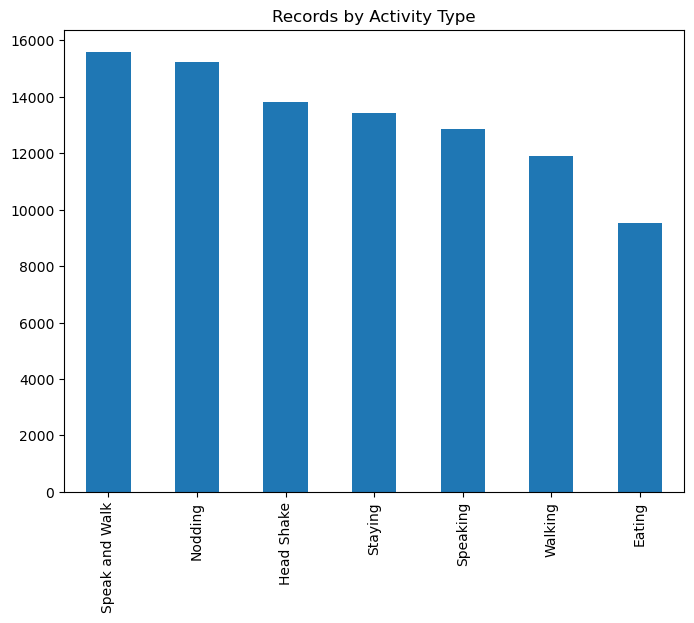

In [433]:
df['Activity'].value_counts().plot(kind='bar', title='Records by Activity Type', figsize=(8, 6),align='center');

In [434]:
# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'

df['Ax'] = df['Ax'] / df['Ax'].max()
df['Ay'] = df['Ay'] / df['Ay'].max()
df['Az'] = df['Az'] / df['Az'].max()

df['Gx'] = df['Gx'] / df['Gx'].max()
df['Gy'] = df['Gy'] / df['Gy'].max()
df['Gz'] = df['Gz'] / df['Gz'].max()

# Round numbers
df = df.round({'Ax': 5, 'Ay': 5, 'Az': 5, 'Gx': 5, 'Gy': 5, 'Gz': 5})

In [435]:
N_TIME_STEPS = 80
N_FEATURES = 6
n_outputs=7
step = 20
segments = []
labels = []

for i in range(0, len(df) - N_TIME_STEPS, step):
    Ax = df['Ax'].values[i: i + N_TIME_STEPS]
    Ay = df['Ay'].values[i: i + N_TIME_STEPS]
    Az = df['Az'].values[i: i + N_TIME_STEPS]
    
    Gx = df['Gx'].values[i: i + N_TIME_STEPS]
    Gy = df['Gy'].values[i: i + N_TIME_STEPS]
    Gz = df['Gz'].values[i: i + N_TIME_STEPS]
    
    label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([Ax, Ay, Az, Gx, Gy, Gz])
    labels.append(label)

/tmp/ipykernel_32/26246347.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
/tmp/ipykernel_32/26246347.py:17: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]


In [436]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
reshaped_segments.shape

(4614, 80, 6)

In [437]:
labels.shape

(4614, 7)

In [438]:


model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(N_TIME_STEPS,N_FEATURES)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# fit network
history = model.fit(reshaped_segments,labels, 
                    epochs=100, batch_size=100, verbose=1)

Epoch 1/100
47/47 [==============================] - 2s 23ms/step - loss: 1.0070 - accuracy: 0.6430
Epoch 2/100
47/47 [==============================] - 1s 22ms/step - loss: 0.4992 - accuracy: 0.8028
Epoch 3/100
47/47 [==============================] - 1s 23ms/step - loss: 0.4549 - accuracy: 0.8240
Epoch 4/100
47/47 [==============================] - 1s 22ms/step - loss: 0.3528 - accuracy: 0.8593
Epoch 5/100
47/47 [==============================] - 1s 22ms/step - loss: 0.3227 - accuracy: 0.8713
Epoch 6/100
47/47 [==============================] - 1s 22ms/step - loss: 0.2986 - accuracy: 0.8810
Epoch 7/100
47/47 [==============================] - 1s 22ms/step - loss: 0.3067 - accuracy: 0.8713
Epoch 8/100
47/47 [==============================] - 1s 23ms/step - loss: 0.2656 - accuracy: 0.8908
Epoch 9/100
47/47 [==============================] - 1s 22ms/step - loss: 0.2553 - accuracy: 0.8964
Epoch 10/100
47/47 [==============================] - 1s 22ms/step - loss: 0.2365 - accuracy: 0.9053

In [439]:
dataset_path = '/kaggle/input/esense2/Dataset/test/'
person_folders = os.listdir(dataset_path)
print(person_folders)

df_t = pd.DataFrame()
df_t_list = []

for i in range(len(person_folders)):
    person_folder = person_folders[i]
    csv_file_path = dataset_path + person_folder + '/'
    csv_files = os.listdir(csv_file_path)

    for j in range(len(csv_files)):
        csv_file = csv_files[j]
        #print(csv_file)

        data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
        df_t_list.append(data_frame)

df_t = pd.concat(df_t_list, axis = 0, sort= True, ignore_index = True)
df_t.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Label', 'Activity']

['P1']


In [440]:
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'

df_t['Ax'] = df_t['Ax'] / df_t['Ax'].max()
df_t['Ay'] = df_t['Ay'] / df_t['Ay'].max()
df_t['Az'] = df_t['Az'] / df_t['Az'].max()

df_t['Gx'] = df_t['Gx'] / df_t['Gx'].max()
df_t['Gy'] = df_t['Gy'] / df_t['Gy'].max()
df_t['Gz'] = df_t['Gz'] / df_t['Gz'].max()

# Round numbers
df_t = df_t.round({'Ax': 5, 'Ay': 5, 'Az': 5, 'Gx': 5, 'Gy': 5, 'Gz': 5})

In [441]:
N_TIME_STEPS = 80
N_FEATURES = 6
step = 20
segments = []
labels = []
for i in range(0, len(df_t) - N_TIME_STEPS, step):
    Ax = df_t['Ax'].values[i: i + N_TIME_STEPS]
    Ay = df_t['Ay'].values[i: i + N_TIME_STEPS]
    Az = df_t['Az'].values[i: i + N_TIME_STEPS]
    
    Gx = df_t['Gx'].values[i: i + N_TIME_STEPS]
    Gy = df_t['Gy'].values[i: i + N_TIME_STEPS]
    Gz = df_t['Gz'].values[i: i + N_TIME_STEPS]
    
    label = stats.mode(df_t['Activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([Ax, Ay, Az, Gx, Gy, Gz])
    labels.append(label)

/tmp/ipykernel_32/587865543.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df_t['Activity'][i: i + N_TIME_STEPS])[0][0]
/tmp/ipykernel_32/587865543.py:15: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  label = stats.mode(df_t['Activity'][i: i + N_TIME_STEPS])[0][0]


In [442]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels= np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [443]:
print('X_test : ', reshaped_segments.shape)
print('y_test : ', labels.shape)

X_test :  (673, 80, 6)
y_test :  (673, 4)


In [444]:
predict = model.predict(reshaped_segments)
predicted_labels = np.argmax(predict, axis=1)
true_classes = np.argmax(labels, axis=-1)

22/22 [==============================] - 0s 5ms/step


In [445]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# assuming y_test are your true labels
print("Accuracy: ", accuracy_score(true_classes, predicted_labels))

Accuracy:  0.20950965824665677
